In [1]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

In [2]:
color = [[ 'peachpuff','--', 'k', ], ['c',None,'k'], ['honeydew', '////', 'k'], ['plum','--','k'], ["w","..", 'k', ], 
    ['rosybrown', '..', 'k',],['lemonchiffon', None, 'k',] ,['lavenderblush', '\\\\', 'k'], ['lightskyblue', '////', 'k'], 
         ['lightcyan','xx', 'k'], ['cornflowerblue', '//', 'k',],  
]

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

label_font_size = 10
tick_font_size = 10
legend_font_size = 10

fig_w = 3
fig_h = 1.8
bar_name2 = "NVMe\n-M2"
bar_name = "NVMe-M2"
device_dict2 = {
    "PMem": "PMem\n-M1",
    "SSD1": "SSD\n-M1",
    "SSD2": "SSD\n-M2",
    "nvme": bar_name2,    
}
device_dict = {
    "PMem": "PMem-M1",
    "SSD1": "SSD-M1",
    "SSD2": "SSD-M2",
    "nvme": bar_name,    
}
device_colour_dict = {
    "PMem": "firebrick",
    "SSD1": "cornflowerblue",
    "SSD2": "navy",
    "nvme": "orange",    
}
mode_colour_dict = {"powersave": 'lightblue', "performance":"cornflowerblue", "userspace": "forestgreen"}


fio's throughput under different frequency.


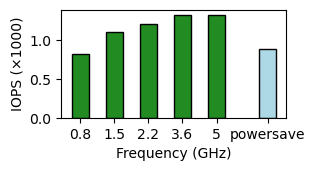

In [3]:
interval = 0
y = np.array([821, 1096, 1206, 1322, 1321])/1000

x = np.arange(len(y))
colors = [mode_colour_dict["userspace"]] * len(y)
colors.append(mode_colour_dict["powersave"])
label = ["0.8", "1.5" ,"2.2", "3.6" ,"5"] # add
x = np.append(x, len(y)+0.5)
y = np.append(y, 880/1000)
label.append("powersave")

width = 0.5
fig, ax = plt.subplots(figsize=(fig_w, fig_h))
ln1 = plt.bar(x, y, width = width, edgecolor = 'k', color = colors)# , color = colours, edgecolor = edgecolours, hatch = hatches, zorder = 10
plt.xticks(x, label, fontsize = tick_font_size )
plt.yticks(fontsize = tick_font_size)
plt.subplots_adjust(0.18, 0.35, 0.93, 0.95, None, None)
ln2 = plt.bar([5], [], width = width, edgecolor = "k", color = "blue")
plt.xlabel("Frequency (GHz)", fontsize = label_font_size)
plt.ylabel("IOPS (×1000)", fontsize = label_font_size)
# ax.set_ylim(500, 1550)
figname = "./figs/mot_freq-IOPS.pdf"
plt.savefig(figname)


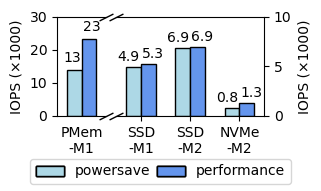

In [4]:
powersave = np.array([13.8,  4.932,  6.896, 0.831, ])# 32, # 545,
performance =  np.array([23.2, 5.269, 6.929, 1.266, ]) #  79, # 518, 
labels = [device_dict2["PMem"], device_dict2["SSD1"], device_dict2["SSD2"], device_dict2["nvme"]] # "M1-HDD", "M2-HDD", 

# Pmem
y1 = powersave[:1] 
y2 = performance[:1] #  /powersave
x1 = np.arange(len(y1))

# The rest SSDs
x2 = np.arange(len(y1), len(labels), 1)
y3 = powersave [1:]# / powersave
y4 = performance [1:]

width = 0.3
# Create a figure and a gridspec with height ratios
fig = plt.figure(figsize=(fig_w, fig_h))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 3])  # Adjust height_ratios to make the upper plot larger

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1]) #, sharex=ax1

ax1.set_xlim(-0.5, 0.5)
ax2.set_xlim(0.5, 3.5)

ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.yaxis.tick_right()

# ax1.set_xlim(0, 100)

ax1.set_xticks(x1, labels[:1], fontsize = tick_font_size )
ax2.set_xticks(x2, labels[1:], fontsize = tick_font_size)

plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)


ax1.tick_params(axis='x', which='both', bottom=False, top=False, labeltop=False)
d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ln_powersave_pmem = ax1.bar(x1 - width/2, y1, width = width, color = mode_colour_dict["powersave"] , edgecolor = 'k')
ln_performance_pmem = ax1.bar(x1 + width/2, y2, width = width, color = mode_colour_dict["performance"], edgecolor = 'k')
ln_powersave_ssd = ax2.bar(x2 - width/2, y3, width = width, color = mode_colour_dict["powersave"], edgecolor = 'k')
ln_performance_ssd = ax2.bar(x2 + width/2, y4, width = width, color = mode_colour_dict["performance"], edgecolor = 'k')

d = 0.5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,linestyle="none",color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
ax1.set_ylabel("IOPS (×1000)", fontsize = label_font_size)
ax2.set_ylabel("IOPS (×1000)", fontsize = label_font_size)
ax2.yaxis.set_label_position("right")

ax1.set_ylim(0,30)
ax2.set_ylim(0,10)

legend = fig.legend([ln_powersave_pmem + ln_powersave_ssd, ln_performance_pmem + ln_performance_ssd], 
                    ["powersave", "performance"], 
                    fontsize=legend_font_size, loc="lower center",
                    ncol=2, labelspacing=0.2, columnspacing=0.5)
padding = 2.4
for x, y in zip(x1 , y1):
    ax1.text(x - width/2 - 0.05, y + padding, int(y), ha='center', fontsize=10, transform=ax1.transData)
for x, y in zip(x1 , y2):
    ax1.text(x + width/2 + 0.05, y + padding, int(y), ha='center', fontsize=10, transform=ax1.transData)
padding = 0.8
for x, y in zip(x2 , y3):
    ax2.text(x - width/2 - 0.1, y + padding - 0.2, "%.1f" % y, ha='center', fontsize=10, transform=ax2.transData)
for x, y in zip(x2 , y4):
    ax2.text(x + width/2 + 0.1, y + padding -0.2, "%.1f" % y, ha='center', fontsize=10, transform=ax2.transData)

plt.subplots_adjust(0.16, 0.4, 0.85, 0.95, 0.1, None)
figname = "./figs/mot_device-IOPS.pdf"
plt.savefig(figname)

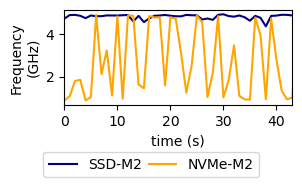

In [5]:
ssd_freq = [4621528, 4852044, 4736821, 4902981, 4913987, 4871665, 4757723, 4885072, 4852409, 4852027, 4888425, 4884741, 4884443, 4897475, 4905083, 4607343, 4867281, 4572890, 4745794, 4870029, 4884083, 4909288, 4874411, 4848445, 4845557, 4912375, 4895836, 4889628, 4696357, 4742879, 4678033, 4917834, 4941959, 4857043, 4829704, 4885143, 4800562, 4638425, 4868380, 4774508, 4370952, 4867067, 4879660, 4919140, 4914290, 4885498, 4906475, 4628409, 4941368, 4910234, 3968709]
nvme_freq = [2915386, 990735, 865830, 1065031, 1786543, 1842839, 869324, 1019761, 4912572, 2114247, 3227709, 1100635, 4845867, 948929, 4882673, 4870945, 1624175, 1439442, 4858158, 4791029, 4792785, 1575562, 4793844, 4744104, 3116347, 1235661, 2502629, 4881796, 4556696, 1029119, 2177222, 4851203, 1004598, 1844069, 3467847, 1086078, 917892, 906563, 4787933, 3946675, 933571, 4739709, 2782986, 1315946, 922520, 1007205, 4735031, 841435, 4111343, 1385994]

ssd_freq = np.array(ssd_freq [2: -2])/1000000
nvme_freq = np.array(nvme_freq[2: -2])/1000000
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

ln_ssd =  ax.plot(ssd_freq, label = "SSD", color = device_colour_dict["SSD2"]) #
ln_nvme = ax.plot(nvme_freq, label = "nvme", color = device_colour_dict["nvme"]) #

plt.xticks(fontsize = tick_font_size)
plt.yticks(fontsize = tick_font_size)
ax.set_xlabel('time (s)', fontsize = label_font_size)
ax.set_ylabel('Frequency\n(GHz)', fontsize = label_font_size)

plt.xlim(0, 43)
# Add a legend
legend = fig.legend([ln_ssd[0], ln_nvme[0]], [device_dict["SSD2"], device_dict["nvme"]], fontsize = legend_font_size, loc = "lower center", ncol = 2, labelspacing=0.2, columnspacing=0.5) # 

plt.subplots_adjust(0.22, 0.42, 0.98, 0.95, None, None)
figname = "./figs/mot_device-freq-M2.pdf"
plt.savefig(figname)


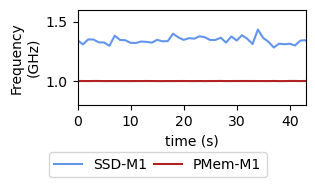

In [6]:
pmem_freq = [1071944, 1004008, 1003906, 1004132, 1003686, 1004208, 1004029, 1003535, 1003891, 1003549, 1003636, 1003680, 1003552, 1003825, 1003802, 1004192, 1003818, 1003470, 1003337, 1003873, 1003524, 1003890, 1004070, 1003695, 1003514, 1003877, 1003381, 1003910, 1003945, 1004502, 1003587, 1003812, 1004122, 1003983, 1004124, 1003996, 1003940, 1003705, 1003565, 1004286, 1003269, 1003548, 1004416, 1004384, 1003729, 1004174, 1005404, 1003670, 1003865, 1003779, 1003646, 1003542, 1003788, 1003998, 1004125, 1003644, 1003670, 1003451, 1003785, 1003762, 1003762, 1003623, 1003211, 1003527, 1004032, 1004069, 1003987, 1003689, 1003780, 1004023, 1003619, 1003619, 1003902, 1261900, 1003860, 1003418, 1003326, 1003546, 1003896, 1004146, 1003286, 1003562, 1004329, 1003820, 1003403, 1003392, 1004048, 1003618, 1003325, 1003776, 1003623, 1003977, 1003558, 1004221, 1003663, 1003500, 1255387]
ssd_freq = [1513523, 1320014, 1345918, 1311260, 1352879, 1351871, 1327990, 1327096, 1299355, 1384016, 1348470, 1345705, 1324155, 1322877, 1335237, 1331939, 1325618, 1349610, 1337056, 1338508, 1400979, 1369416, 1348926, 1363377, 1359400, 1379206, 1371059, 1348159, 1348322, 1367190, 1326019, 1377900, 1343543, 1387980, 1357913, 1314436, 1435898, 1365511, 1332730, 1284911, 1317236, 1312222, 1316466, 1302064, 1342470, 1346834, 1298403, 1343752, 1322977, 1337276, 1333658, 1324469, 1335731, 1305618, 1313722, 1309645, 1308973, 1314757, 1328732, 1319663, 1333666, 1318989, 1297398, 1310358, 1312851, 1344213, 1322142, 1293622, 1297540, 1359133, 1317297, 1308988, 1335271, 1324454, 1313938, 1362707, 1310845, 1324685, 1319866, 1311298, 1312568, 1320960, 1421881, 1296160, 1313640, 1328505, 1338757, 1310617, 1334805, 1318832, 1339351, 1343264, 1346387, 1325509, 1320270, 1342482, 1340035, 2522895]

ssd_freq = np.array(ssd_freq [2: -2])/1000000
pmem_freq = np.array(pmem_freq[2: -2])/1000000
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

ln_pmem = ax.plot(pmem_freq, label = "PMem", color = device_colour_dict["PMem"]) #
ln_ssd =  ax.plot(ssd_freq, label = "SSD1", color = device_colour_dict["SSD1"]) #


plt.xticks(fontsize = tick_font_size)
plt.yticks(fontsize = tick_font_size)

ax.set_xlabel('time (s)', fontsize = label_font_size)
ax.set_ylabel('Frequency\n(GHz)', fontsize = label_font_size)

plt.xlim(0, 43)
plt.ylim(0.8, 1.6)
plt.subplots_adjust(0.22, 0.23, 0.97, 0.95, None, None)
# Add a legend
legend = fig.legend([ln_ssd[0], ln_pmem[0]], [device_dict["SSD1"], device_dict["PMem"]], fontsize = legend_font_size, loc = "lower center", ncol = 2, labelspacing=0.2, columnspacing=0.5) # 

plt.subplots_adjust(0.22, 0.42, 0.98, 0.95, None, None)
figname = "./figs/mot_device-freq-M1.pdf"
plt.savefig(figname)


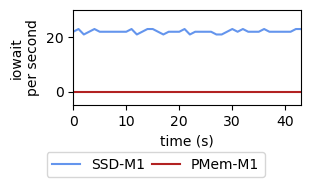

In [7]:
pmem1 = [0] * 50
ssd1 = [16, 23, 22, 23, 21, 22, 23, 22, 22, 22, 22, 22, 22, 23, 21, 22, 23, 23, 22, 21, 22, 22, 22, 23, 21, 22, 22, 22, 22, 21, 21, 22, 23, 22, 23, 22, 22, 22, 23, 22, 22, 22, 22, 22, 23, 23, 20, 23, 23, 23, 23, 7]
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

ln_pmem1 = ax.plot(pmem1[2: -2], label = device_dict["PMem"], color = device_colour_dict["PMem"])
ln_ssd1 = ax.plot(ssd1[2: -2], label = device_dict["SSD1"], color = device_colour_dict["SSD1"]) 
plt.xticks(fontsize = tick_font_size)
plt.yticks(fontsize = tick_font_size)
# Add title and labels
# plt.title('iowait of different devices')
ax.set_xlabel('time (s)', fontsize = label_font_size)
ax.set_ylabel('iowait\nper second', fontsize = label_font_size)

plt.xlim(0, 43)
plt.ylim(-5, 30)
# Add a legend
legend = fig.legend([ln_ssd1[0], ln_pmem1[0]], [ device_dict["SSD1"], device_dict["PMem"]], fontsize = legend_font_size, loc = "lower center", ncol = 2, labelspacing=0.2, columnspacing=0.5) # 

plt.subplots_adjust(0.22, 0.42, 0.98, 0.95, None, None)
# plt.show()
figname = "./figs/mot_device-iowait.pdf"
plt.savefig(figname)


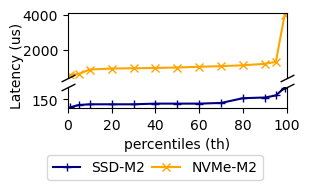

In [8]:
x = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 99, 99.5, 99.9, 99.95, 99.99][:-4]

nvme_lat = [578, 627, 881, 938, 955, 971, 996, 1037, 1074, 1123, 1205, 1319, 3982, 4293, 5145, 7046, 7767][:-4]
ssd3_lat = [126, 133, 135, 135, 135, 137, 137, 137, 139, 153, 155, 161, 184, 192, 227, 245, 289][:-4]

# Create a figure and a gridspec with height ratios
fig = plt.figure(figsize=(fig_w, fig_h))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1])  # Adjust height_ratios to make the upper plot larger

# Create the upper subplot
ax1 = fig.add_subplot(gs[0, 0])
# Create the lower subplot
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)

ax1.set_ylim(400, 4100)
ax2.set_yticks(range(150, 320, 100))
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()

ax1.set_xlim(0, 100)
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)
ax2.set_ylabel('Latency (us)', fontsize=label_font_size)
ax2.set_xlabel('percentiles (th)', fontsize=label_font_size)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labeltop=False)
d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ln_nvme = ax1.plot(x, nvme_lat, label= device_dict["nvme"], marker='x', color = device_colour_dict["nvme"])
ln_ssd3 = ax2.plot(x, ssd3_lat, label = device_dict["SSD2"], marker='+', color = device_colour_dict["SSD2"])

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax2.yaxis.set_label_coords(-0.2, 2)  # Adjust the coordinates relative to the figure
legend = fig.legend([ln_ssd3[0], ln_nvme[0]], 
                    [device_dict["SSD2"], device_dict["nvme"]], 
                    fontsize=legend_font_size, loc="lower center",
                    ncol = 2, labelspacing=0.2, columnspacing=0.5)

plt.subplots_adjust(0.22, 0.42, 0.95, 0.95, None, None)
figname = "./figs/mot_perc_lat.pdf"
plt.savefig(figname)